# Setup

In [31]:
import os

os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
os.environ["TF_FORCE_GPU_ALLOW_GROWTH"] = "true"

In [32]:
# Add directory above current directory to path
import sys

sys.path.insert(0, '..')

In [33]:
import json
import glob
from utils.metrics import extract_metrics_config, Metric

In [34]:
file_list = glob.glob('./experiments/configs/*.json')

configs = [json.load(open(file)) for file in file_list]

In [35]:
# add prefix to path

for config in configs:
    config["model"]["training"][
        "log_dir"] = "experiments/" + config["model"]["training"]["log_dir"]

# Load metrics

In [36]:
metrics = [Metric(**extract_metrics_config(config)) for config in configs]

# ROC Curve

[[<matplotlib.lines.Line2D at 0x7f60382b0400>],

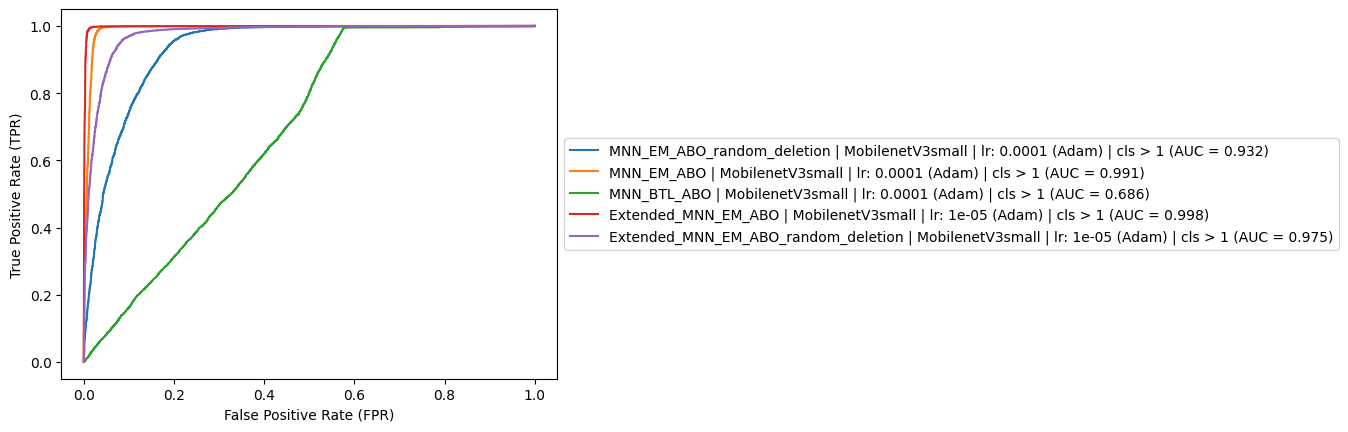

In [37]:
[metric.plot_roc() for metric in metrics]

# Precision-Recall Curve (PRC)

[[<matplotlib.lines.Line2D at 0x7f603e0ba490>],

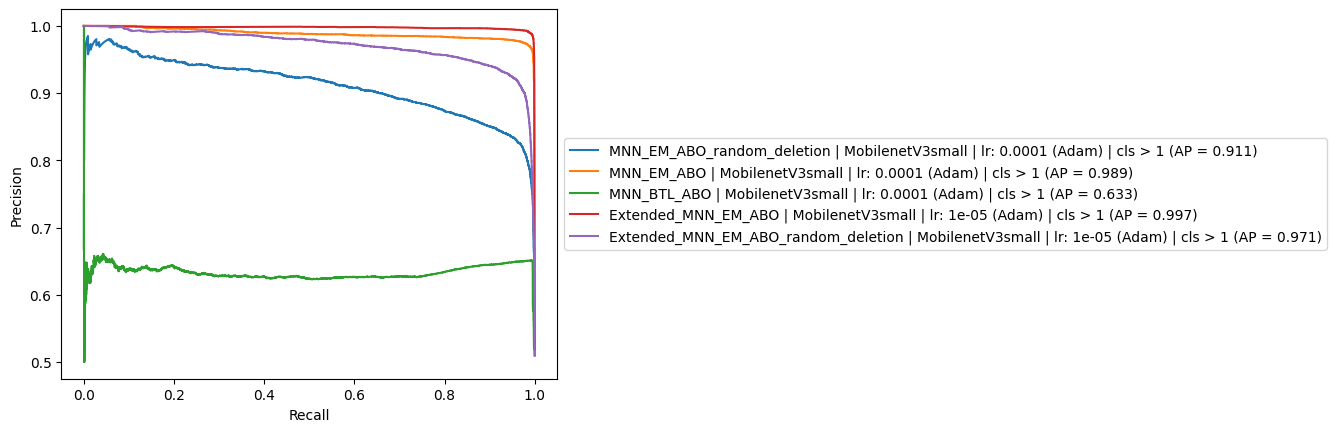

In [38]:
[metric.plot_prc() for metric in metrics]

# Optimal accuracy

The `optimize_threshold()` method calculates and outputs optimal threshold for ROC curve using G-Mean and Youden-Index/J, as well as the optimal threshold for Precision-Recall curve using F-Score.

See also https://machinelearningmastery.com/threshold-moving-for-imbalanced-classification/

In [39]:
import pandas as pd

In [40]:
metrics_df = pd.DataFrame.from_dict(
    [metric.optimize_threshold() for metric in metrics])
metrics_df

,Model name,Image CNN,Optimizer,lr,cls,AUC-ROC,AUC-PRC,G-Mean,Threshold G-Mean,Accuracy G-Mean,J,Threshold J,Accuracy J,Precision,Recall,F-Score,Threshold F-Score,Accuracy F-Score
0,MNN_EM_ABO_random_deletion,MobilenetV3small,Adam,0.00010,1,0.931960,0.911286,0.874926,0.427140,0.879531,0.756354,0.427140,0.879531,0.824731,0.968516,0.890859,0.281702,0.879036
1,MNN_EM_ABO,MobilenetV3small,Adam,0.00010,1,0.991360,0.988667,0.978022,0.293328,0.978474,0.956186,0.293328,0.978474,0.969139,0.990140,0.979527,0.274656,0.978474
2,MNN_BTL_ABO,MobilenetV3small,Adam,0.00010,1,0.686229,0.633044,0.649479,-0.346517,0.718945,0.417049,-0.471757,0.719660,0.650697,0.994158,0.786569,-0.482337,0.719600
3,Extended_MNN_EM_ABO,MobilenetV3small,Adam,0.00001,1,0.997729,0.997415,0.990199,0.876642,0.990248,0.980406,0.876642,0.990248,0.988249,0.993121,0.990679,0.870976,0.990248
4,Extended_MNN_EM_ABO_random_deletion,MobilenetV3small,Adam,0.00001,1,0.975119,0.970694,0.936174,0.649181,0.936833,0.872928,0.649181,0.936833,0.916953,0.963245,0.939529,0.614683,0.936763
